# ⚡️study by 석민⚡️

# selenium 설치

### Selenium

- Selenium은 웹 애플리케이션 테스트를 위한 프레임워크입니다. 
- 원래 웹 애플리케이션의 자동화 테스트를 위해 개발되었지만, 웹 브라우저를 자동화하는 도구로서 크롤링, 웹 사이트의 자동화 테스트, 웹 UI를 통한 작업 자동화 등 다양한 작업에 널리 사용됩니다.
- Python과 같은 여러 프로그래밍 언어에서 사용할 수 있으며, WebDriver API를 통해 웹 브라우저를 제어합니다.
>- 웹 브라우저를 원격 조작하는 도구
>- 자동으로 URL을 열고 클릭 등이 가능
>- 스크롤, 문자의 입력, 화면 캡처 등등

~~~cmd
pip install selenium
~~~

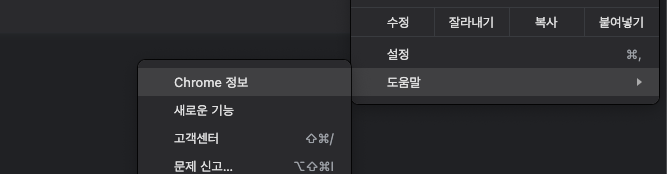

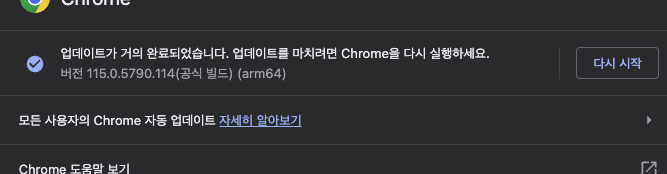

### ChromeDriver Download - URL
- Chrome 버전에 맞는 Driver 다운받기

https://chromedriver.chromium.org/downloads

# selenium 기초

### webdriver 사용하기

In [1]:
from selenium import webdriver

# ChromeOptions 객체를 생성합니다.
chrome_options = webdriver.ChromeOptions()

# 웹드라이버의 경로를 설정합니다.
chrome_options.binary_location = "../ds_study/unit4/driver/chromedriver"

# Chrome 웹드라이버를 초기화합니다.
driver = webdriver.Chrome(options = chrome_options)

# 원하는 웹 페이지에 접근합니다.
driver.get("https://pinkwink.kr/")

In [2]:
# 스크롤 가능한 높이
last_height = driver.execute_script("return document.body.scrollHeight")
last_height

5615

### 화면 스크롤

In [3]:
# 화면 스크롤 -> 맨 아래로
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

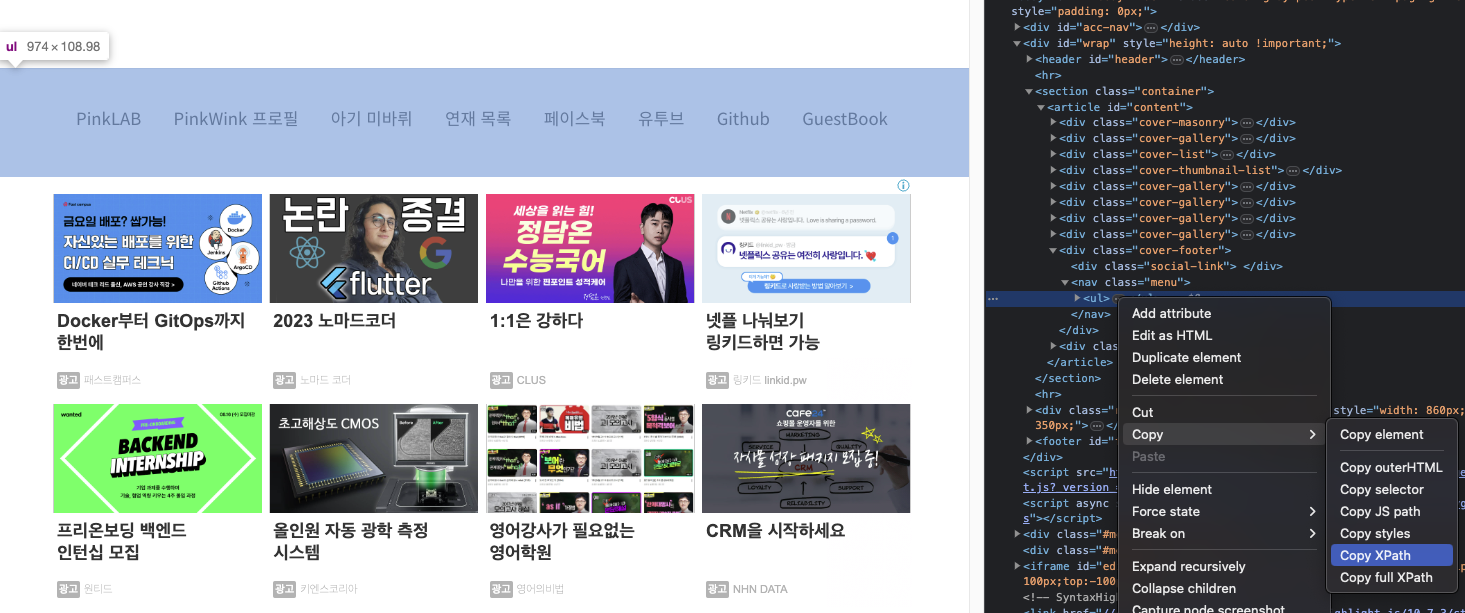

In [8]:
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By

# 찾는 xpath지점까지 스크롤하는 코드
# By.XPATH를 사용하여 XPATH라는 방식을 지정하고, 그 다음 인수로 실제 Xpath 문자열을 전달합니다.
some_tag = driver.find_element(By.XPATH, '''//*[@id="content"]/div[9]/nav/ul/li[1]/a''')
action = ActionChains(driver)
action.move_to_element(some_tag).perform()

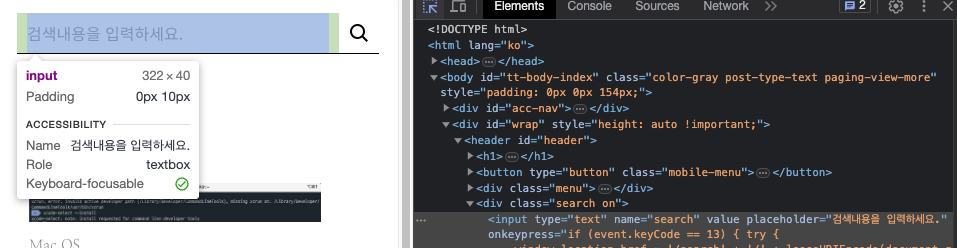

In [11]:
# value 로 찾기
some_tag = driver.find_element(By.NAME, 'search')
some_tag.send_keys("data science")

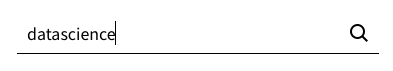

In [12]:
# 검색 엔터로 화면 넘어가기
from selenium.webdriver.common.keys import Keys
some_tag.send_keys(Keys.ENTER)

In [8]:
# 현재 화면의 html코드 가져오기
from bs4 import BeautifulSoup

req = driver.page_source
soup = BeautifulSoup(req, "html.parser")

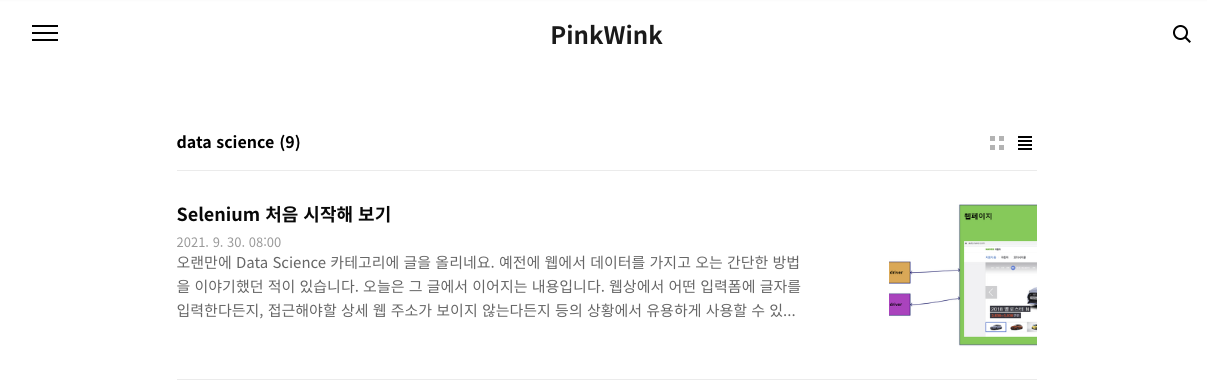

In [9]:
# 이러한 방식으로 접근 가능
result = soup.find_all("div", "post-item")
result[0]

<div class="post-item">
<a href="/1363">
<span class="thum">
<img alt="" src="//i1.daumcdn.net/thumb/C264x200/?fname=https://blog.kakaocdn.net/dn/bagkwX/btrgi1Ju3KA/pAi2k61pvKrLEoPQCHU8I1/img.png"/>
</span>
<span class="title">Selenium 처음 시작해 보기</span>
<span class="date">2021. 9. 30. 08:00</span>
<span class="excerpt">오랜만에 Data Science 카테고리에 글을 올리네요. 예전에 웹에서 데이터를 가지고 오는 간단한 방법을 이야기했던 적이 있습니다. 오늘은 그 글에서 이어지는 내용입니다. 웹상에서 어떤 입력폼에 글자를 입력한다든지, 접근해야할 상세 웹 주소가 보이지 않는다든지 등의 상황에서 유용하게 사용할 수 있는 도구가 selenium입니다. 위 그림에 나타나있듯이 selenium은 사용하는 브라우저에 맞춰 드라이버를 실행합니다. 그러면 해당 드라이버가 웹페이지를 읽을 브라우저를 실행해서 나의 코드에 의해 제어되도록 되는 것입니다. 설치는 pip 명령으로 먼저 진행하구요. 아래 그림처럼 자신의 크롬 버전을 확인합니다. 우측 상단 점 세개를 클릭한 다음 도움말의 크롬 버전을 확인하시면 됩니다. 크롬드라이버 다운로드 ..</span>
</a>
</div>

# 데이터 얻어오기

### 싼 주유소 URL
https://www.opinet.co.kr/user/main/mainView.do

## 사이트 구조 분석

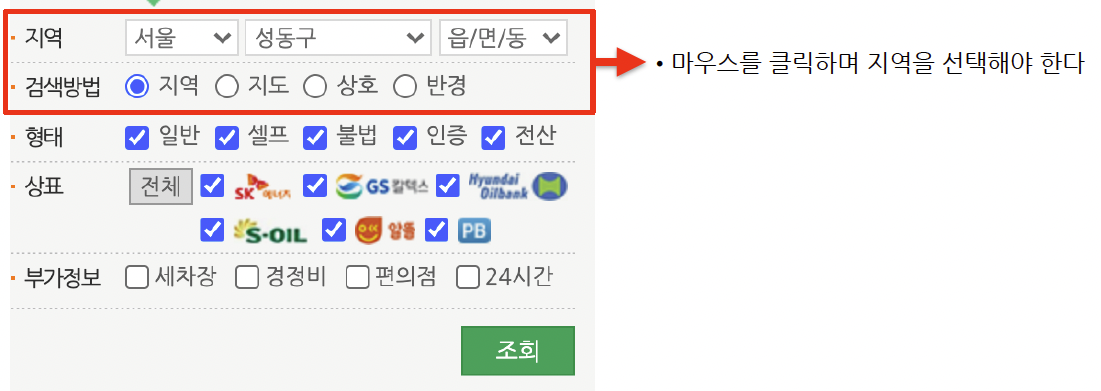

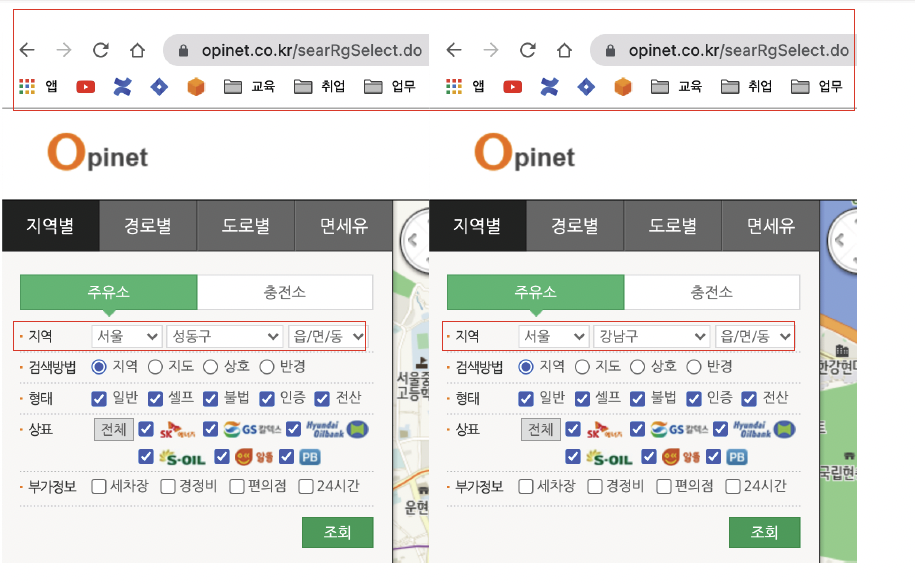

- 지역을 선택해도 드러난 웹 주소가 변경되지 않는다.

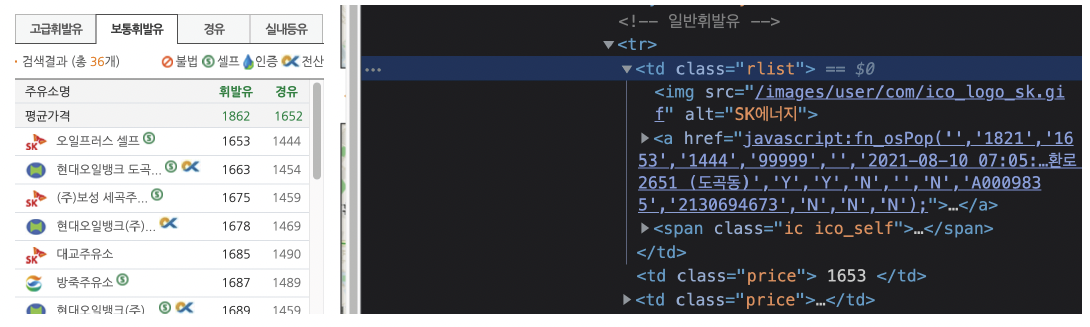

- 생각보다 HTML 소스에서 원하는 정보를 얻는 것도 쉬워보이지 않는다.

In [12]:
from selenium import webdriver

# 객체 생성
chrome_options = webdriver.ChromeOptions()

# 드라이버 경로 설정
chrome_options.binary_location = "../ds_study/unit4/driver/chromedriver"

# 드라이버 최기화
driver = webdriver.Chrome(options = chrome_options)

# 불러오기(실행)
driver.get("http://www.opinet.co.kr")

In [13]:
# 지도 페이지 접근
driver.get("http://www.opinet.co.kr/searRgSelect.do")

### 지역 데이터 갖고오기

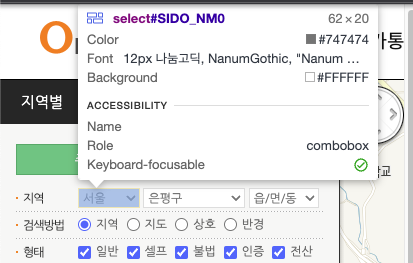

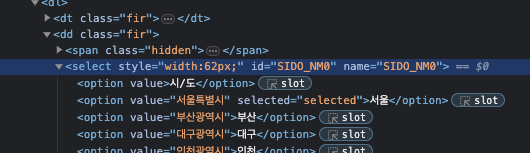

In [7]:
from selenium.webdriver.common.by import By

sido_list_row = driver.find_element(By.ID, '''SIDO_NM0''')
sido_list_row

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="SIDO_NM0"]"}
  (Session info: chrome=115.0.5790.170); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
0   chromedriver                        0x000000010120aa6c chromedriver + 4303468
1   chromedriver                        0x0000000101203198 chromedriver + 4272536
2   chromedriver                        0x0000000100e37594 chromedriver + 292244
3   chromedriver                        0x0000000100e748fc chromedriver + 542972
4   chromedriver                        0x0000000100ead628 chromedriver + 775720
5   chromedriver                        0x0000000100e68b40 chromedriver + 494400
6   chromedriver                        0x0000000100e69988 chromedriver + 498056
7   chromedriver                        0x00000001011cb924 chromedriver + 4045092
8   chromedriver                        0x00000001011cfe68 chromedriver + 4062824
9   chromedriver                        0x00000001011d6088 chromedriver + 4087944
10  chromedriver                        0x00000001011d096c chromedriver + 4065644
11  chromedriver                        0x00000001011a8e64 chromedriver + 3903076
12  chromedriver                        0x00000001011ec55c chromedriver + 4179292
13  chromedriver                        0x00000001011ec6b4 chromedriver + 4179636
14  chromedriver                        0x00000001011fc978 chromedriver + 4245880
15  libsystem_pthread.dylib             0x00000001a236bfa8 _pthread_start + 148
16  libsystem_pthread.dylib             0x00000001a2366da0 thread_start + 8


### 기대한 결과가 아니라서 다시 ㄱ

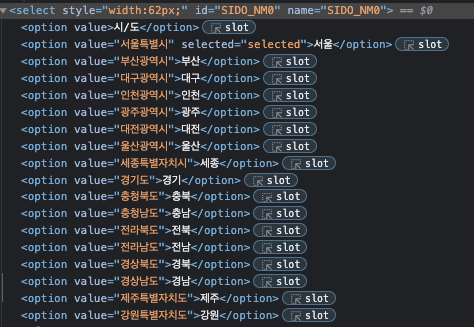

### option 이라는 태그 안에 광역시도의 값을 받아와야 한다.

In [21]:
# 다수의 element 값을 가져올 때는 "find_elements"입력
sido_list = sido_list_row.find_elements(By.TAG_NAME, "option")
sido_list

[<selenium.webdriver.remote.webelement.WebElement (session="3e9a1381b1d364b20cf497a9ec319a99", element="270869976C318124DA8428FF2382D7D3_element_261")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3e9a1381b1d364b20cf497a9ec319a99", element="270869976C318124DA8428FF2382D7D3_element_266")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3e9a1381b1d364b20cf497a9ec319a99", element="270869976C318124DA8428FF2382D7D3_element_270")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3e9a1381b1d364b20cf497a9ec319a99", element="270869976C318124DA8428FF2382D7D3_element_274")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3e9a1381b1d364b20cf497a9ec319a99", element="270869976C318124DA8428FF2382D7D3_element_278")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3e9a1381b1d364b20cf497a9ec319a99", element="270869976C318124DA8428FF2382D7D3_element_282")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3e9a1381b1d364b20cf497

In [31]:
sido_names = [option.get_attribute("value") for option in sido_list]
sido_names.remove('')

In [32]:
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도',
 '강원특별자치도']

In [33]:
from selenium.webdriver.common.keys import Keys
sido_list_row.send_keys(sido_names[1])

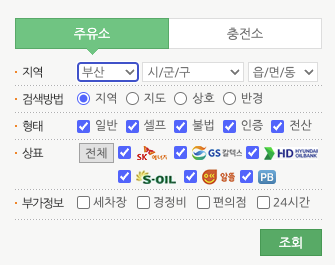

- '서울'에서 sido_name에 1번 index인 '부산'으로 바뀜

In [34]:
sido_list_row.send_keys(sido_names[0])

### 시/군/구 가져오기

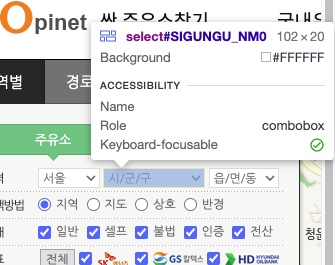

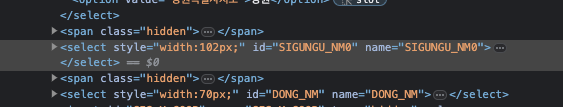

In [38]:
# 시군구 id list 가져오기
sigungu_list_row = driver.find_element(By.ID, '''SIGUNGU_NM0''')

# 시군구 id 안에 option tag 리스트 가져오기
sigungu_list = sigungu_list_row.find_elements(By.TAG_NAME, "option")

<selenium.webdriver.remote.webelement.WebElement (session="3e9a1381b1d364b20cf497a9ec319a99", element="270869976C318124DA8428FF2382D7D3_element_335")>

In [44]:
# option tag 리스트에서 value 값만 가져오 리스트에 저장
sigungu_names = [option.get_attribute("value") for option in sigungu_list]
sigungu_names.remove('')

In [45]:
sigungu_list_row.send_keys(sigungu_names[1])

# 엑셀 파일 가져오기

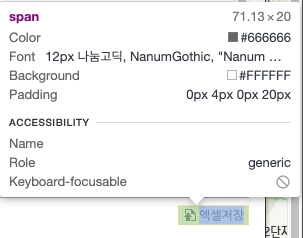

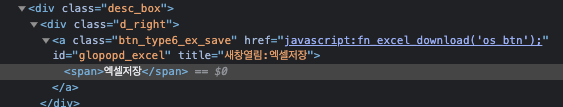

In [47]:
# id 조회 후 클릭으로 파일 저장
element_get_excel = driver.find_element(By.ID, "glopopd_excel").click()

In [49]:
# 반복문으로 모든 구의 데이터를 엑셀 파일로 저장
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(sigungu_names):
    
    option = driver.find_element(By.ID, "SIGUNGU_NM0")
    option.send_keys(gu)
    time.sleep(2)
    
    excel_download = driver.find_element(By.ID, "glopopd_excel").click()
    time.sleep(1)

/var/folders/nc/lry6d8ws417_mblykm_8wpc40000gn/T/ipykernel_18045/63632144.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(sigungu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

In [50]:
# 드라이버 종료
driver.close()

# 데이터 정리하기

In [62]:
import pandas as pd
from glob import glob

stations_files = glob("../ds_study/unit4/data/local_data_by_seokmin/지역_*.xls")

In [63]:
stations_files

['../ds_study/unit4/data/local_data_by_seokmin/지역_위치별(주유소) (9).xls',
 '../ds_study/unit4/data/local_data_by_seokmin/지역_위치별(주유소) (12).xls',
 '../ds_study/unit4/data/local_data_by_seokmin/지역_위치별(주유소) (5).xls',
 '../ds_study/unit4/data/local_data_by_seokmin/지역_위치별(주유소) (24).xls',
 '../ds_study/unit4/data/local_data_by_seokmin/지역_위치별(주유소) (4).xls',
 '../ds_study/unit4/data/local_data_by_seokmin/지역_위치별(주유소) (13).xls',
 '../ds_study/unit4/data/local_data_by_seokmin/지역_위치별(주유소) (8).xls',
 '../ds_study/unit4/data/local_data_by_seokmin/지역_위치별(주유소) (3).xls',
 '../ds_study/unit4/data/local_data_by_seokmin/지역_위치별(주유소) (18).xls',
 '../ds_study/unit4/data/local_data_by_seokmin/지역_위치별(주유소) (22).xls',
 '../ds_study/unit4/data/local_data_by_seokmin/지역_위치별(주유소) (14).xls',
 '../ds_study/unit4/data/local_data_by_seokmin/지역_위치별(주유소) (15).xls',
 '../ds_study/unit4/data/local_data_by_seokmin/지역_위치별(주유소) (23).xls',
 '../ds_study/unit4/data/local_data_by_seokmin/지역_위치별(주유소) (19).xls',
 '../ds_study/unit4/data/

In [68]:
# 하나만 읽어서 확인하기
tmp = pd.read_excel(stations_files[0], header = 2)
tmp.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,지에스칼텍스㈜ 방학동주유소,서울 도봉구 방학로 186,GS칼텍스,02-3493-5189,Y,1939,1689,1509,1375
1,서울특별시,이케이에너지 주식회사,서울 도봉구 도봉로 941 (도봉동),HD현대오일뱅크,02-3494-3641,Y,-,1689,1509,-
2,서울특별시,지에스칼텍스㈜ 도봉주유소,서울 도봉구 도봉로 895 (도봉동),GS칼텍스,02-954-0118,Y,1939,1689,1509,1360
3,서울특별시,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),HD현대오일뱅크,02-955-5185,N,-,1699,1549,1350
4,서울특별시,극동유화(주) 대안주유소,서울 도봉구 마들로 574 (창동),S-OIL,02-996-6640,Y,-,1709,1559,-


In [76]:
# 25개 구의 주요소 excel 파일 불러오기 및 통합 
tmp_raw = []

for file_name in stations_files:
    
    file = pd.read_excel(file_name, header = 2)
    tmp_raw.append(file)
    
stations_raw = pd.concat(tmp_raw)

In [77]:
stations_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,지에스칼텍스㈜ 방학동주유소,서울 도봉구 방학로 186,GS칼텍스,02-3493-5189,Y,1939,1689,1509,1375
1,서울특별시,이케이에너지 주식회사,서울 도봉구 도봉로 941 (도봉동),HD현대오일뱅크,02-3494-3641,Y,-,1689,1509,-
2,서울특별시,지에스칼텍스㈜ 도봉주유소,서울 도봉구 도봉로 895 (도봉동),GS칼텍스,02-954-0118,Y,1939,1689,1509,1360
3,서울특별시,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),HD현대오일뱅크,02-955-5185,N,-,1699,1549,1350
4,서울특별시,극동유화(주) 대안주유소,서울 도봉구 마들로 574 (창동),S-OIL,02-996-6640,Y,-,1709,1559,-


In [78]:
stations_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 8
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      441 non-null    object
 1   상호      441 non-null    object
 2   주소      441 non-null    object
 3   상표      441 non-null    object
 4   전화번호    441 non-null    object
 5   셀프여부    441 non-null    object
 6   고급휘발유   441 non-null    object
 7   휘발유     441 non-null    object
 8   경유      441 non-null    object
 9   실내등유    441 non-null    object
dtypes: object(10)
memory usage: 37.9+ KB


In [80]:
# 필요한 데이터만 추출해서 table 생성
stations = pd.DataFrame({
    "상호": stations_raw["상호"],
    "주소": stations_raw["주소"],
    "가격": stations_raw["휘발유"],
    "셀프": stations_raw["셀프여부"],
    "상표": stations_raw["상표"]
})
stations.head()

,상호,주소,가격,셀프,상표
0,지에스칼텍스㈜ 방학동주유소,서울 도봉구 방학로 186,1689,Y,GS칼텍스
1,이케이에너지 주식회사,서울 도봉구 도봉로 941 (도봉동),1689,Y,HD현대오일뱅크
2,지에스칼텍스㈜ 도봉주유소,서울 도봉구 도봉로 895 (도봉동),1689,Y,GS칼텍스
3,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1699,N,HD현대오일뱅크
4,극동유화(주) 대안주유소,서울 도봉구 마들로 574 (창동),1709,Y,S-OIL


In [82]:
# 구 컬럼 생성
stations["구"] = [address.split()[1] for address in stations["주소"]]

In [86]:
stations["구"].unique()

array(['도봉구', '마포구', '광진구', '중랑구', '관악구', '서대문구', '노원구', '강서구', '양천구',
       '종로구', '서초구', '성동구', '중구', '영등포구', '강북구', '용산구', '강동구', '성북구',
       '송파구', '은평구', '동대문구', '강남구', '금천구', '구로구', '동작구'], dtype=object)

In [87]:
len(stations["구"].unique())

25

## 이상한 value가 있을 시

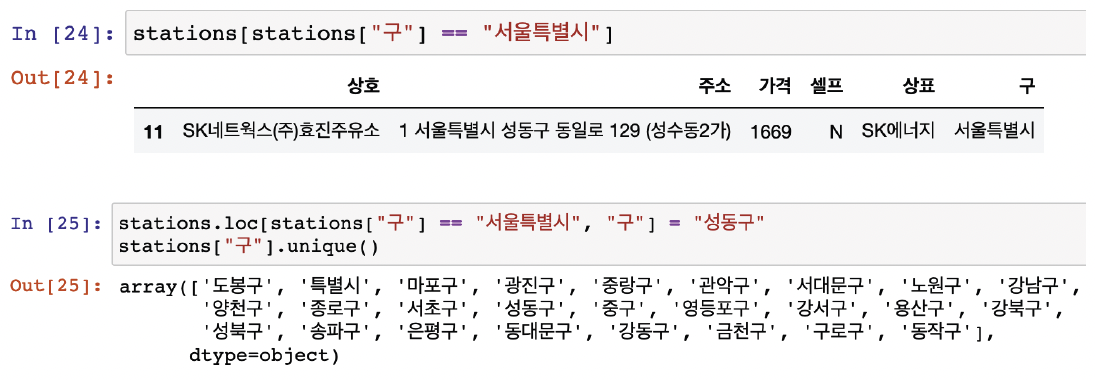

In [91]:
# "가격"컬럼의 value 중 이상치 "-" 값을 뺀 데이터만 다시 저장한다
stations = stations[stations["가격"] != "-"]

# "가격" 컬럼의 type를 float(실수)로 변환.
stations["가격"] = stations["가격"].astype("float")

# 확인
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 8
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      440 non-null    object 
 1   주소      440 non-null    object 
 2   가격      440 non-null    float64
 3   셀프      440 non-null    object 
 4   상표      440 non-null    object 
 5   구       440 non-null    object 
dtypes: float64(1), object(5)
memory usage: 24.1+ KB


In [92]:
# 각 index에 번호 지정
stations.reset_index(inplace = True)

# 불필요 column 삭제
del stations["index"]

# 확인
stations.head()

,상호,주소,가격,셀프,상표,구
0,지에스칼텍스㈜ 방학동주유소,서울 도봉구 방학로 186,1689.0,Y,GS칼텍스,도봉구
1,이케이에너지 주식회사,서울 도봉구 도봉로 941 (도봉동),1689.0,Y,HD현대오일뱅크,도봉구
2,지에스칼텍스㈜ 도봉주유소,서울 도봉구 도봉로 895 (도봉동),1689.0,Y,GS칼텍스,도봉구
3,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1699.0,N,HD현대오일뱅크,도봉구
4,극동유화(주) 대안주유소,서울 도봉구 마들로 574 (창동),1709.0,Y,S-OIL,도봉구


# 주유 가격 시각화

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import platform 

In [95]:
# 폰트 깨짐
import matplotlib.pyplot as plt  # matplotlib 설치시 혹은 터미널 시작시, 1번과 2번, 3번 명령어 입력으로 폰트깨짐 해결.(Mac 한정.)
from matplotlib import rc        # 1번
rc('font', family='AppleGothic') # 2번
plt.rcParams['axes.unicode_minus'] = False # 3번

# Boxplot 해설

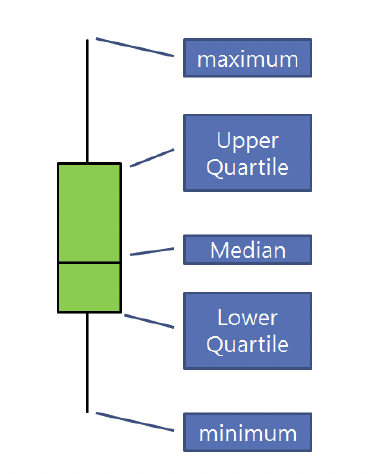

> - Median 중심으로 아래 위 상자가 각각 전체 데이터의 25%씩 총 50%를 가진다

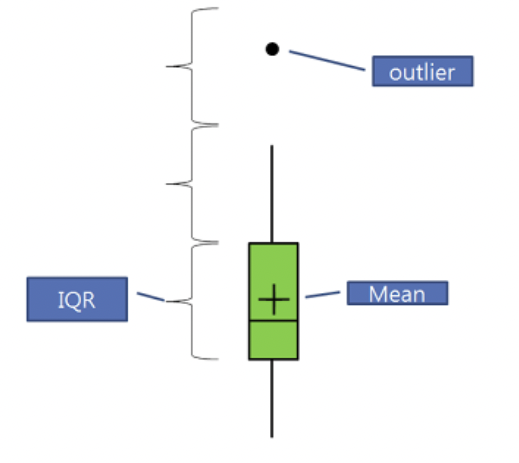

>- 상자 전체 길이를 IQR(Inter Quatile Range)라고 한다.
>- IQR의 1.5배 이상 벗어나면 점으로 별도 표기를 한다.

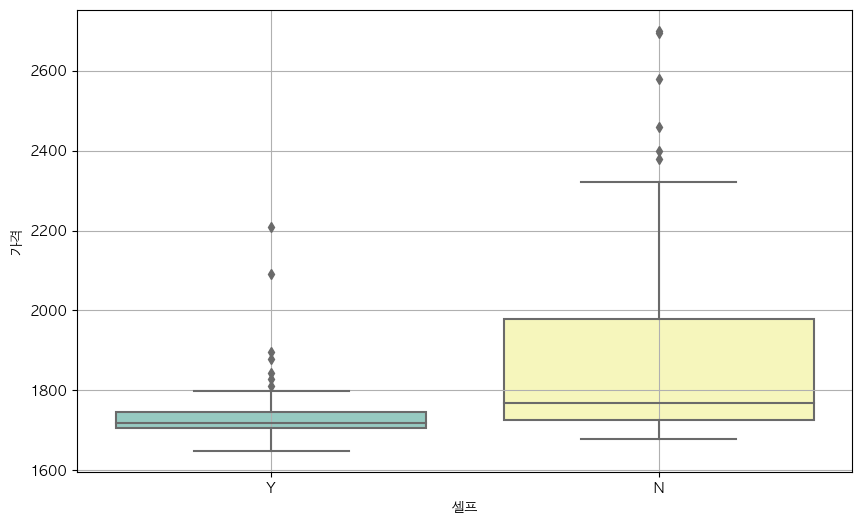

In [101]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = "셀프", y = "가격", data = stations, palette = "Set3")
plt.grid()
plt.show()

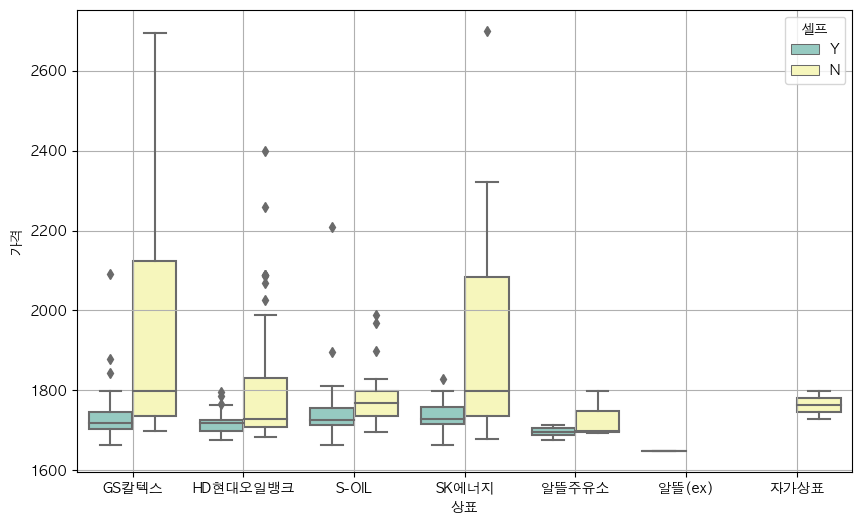

In [102]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = "상표", y = "가격", hue = "셀프", data = stations, palette = "Set3")
plt.grid()
plt.show()

# mapping

In [104]:
import folium
import json
import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)

In [106]:
stations.sort_values("가격", ascending = False).head(10)

,상호,주소,가격,셀프,상표,구
217,서남주유소,서울 중구 통일로 30,2700.0,N,SK에너지,중구
268,서계주유소,서울 용산구 청파로 367 (청파동),2695.0,N,GS칼텍스,용산구
400,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578.0,N,GS칼텍스,강남구
216,필동주유소,서울 중구 퇴계로 196 (필동2가),2459.0,N,GS칼텍스,중구
399,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398.0,N,HD현대오일뱅크,강남구
215,약수주유소,서울 중구 다산로 173,2378.0,N,GS칼텍스,중구
267,한석주유소,서울 용산구 이촌로 164,2321.0,N,SK에너지,용산구
161,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2290.0,N,GS칼텍스,종로구
398,SK논현주유소,서울 강남구 논현로 747 (논현동),2283.0,N,SK에너지,강남구
160,경복궁주유소,서울 종로구 율곡로 6 (중학동),2280.0,N,GS칼텍스,종로구


In [107]:
stations.sort_values("가격", ascending = True).head(10)

,상호,주소,가격,셀프,상표,구
162,만남의광장주유소,서울 서초구 양재대로12길 73-71,1649.0,Y,알뜰(ex),서초구
333,지에스칼텍스(주)수색뉴타운주유소,서울 은평구 수색로 350 (수색동),1664.0,Y,GS칼텍스,은평구
334,타이거주유소,서울 은평구 수색로 188 (증산동),1664.0,Y,SK에너지,은평구
335,㈜오일닷컴 다회주유소,서울 은평구 증산로 441,1664.0,Y,S-OIL,은평구
337,지에스칼텍스㈜ 신사제일주유소,서울 은평구 증산로 423 (신사동),1674.0,Y,GS칼텍스,은평구
336,지에스칼텍스㈜ 서부주유소,서울 은평구 응암로 210 (응암동),1674.0,Y,GS칼텍스,은평구
97,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1676.0,Y,HD현대오일뱅크,강서구
96,화곡역주유소,서울 강서구 강서로 154 (화곡동),1676.0,Y,알뜰주유소,강서구
130,현대주유소,서울 양천구 남부순환로 372 (신월동),1678.0,Y,S-OIL,양천구
131,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1678.0,N,SK에너지,양천구


In [108]:
import numpy as np

gu_data = pd.pivot_table(stations, index = ["구"], values = ["가격"], aggfunc = np.mean )
gu_data.head()

,가격
구,
강남구,1942.764706
강동구,1782.214286
강북구,1721.000000
강서구,1743.939394
관악구,1739.357143


In [111]:
geo_path = "../ds_study/unit2/data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding = "utf-8"))

my_map = folium.Map(location = [37.5502, 126.982], zoom_start = 11, tiles = "Stamen Toner")

folium.Choropleth(
    geo_data = geo_str,
    data = gu_data,
    columns = [gu_data.index, "가격"],
    file_color = "PuRd",
    key_on = "feature.id"
).add_to(my_map)

my_map